In [127]:
import numpy as np
import pandas as pd

In [128]:
df = pd.read_csv('math-for-mlv1/linear-regression/Advertising.csv', index_col=[0])

In [139]:
random_state = 20

In [129]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [130]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Preprocessing

#### Check, whether we have NaN or not

In [260]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Visualising data. (Data seems more linear. So, we can apply linear regression on it)

In [298]:
import matplotlib.pyplot as plt

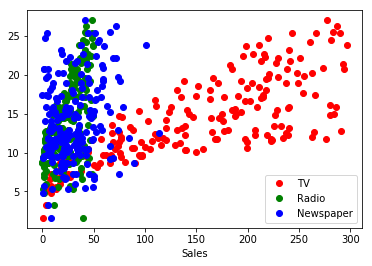

In [322]:
plt.plot(df.TV, df.Sales, 'ro')
plt.plot(df.Radio, df.Sales, 'go')
plt.plot(df.Newspaper, df.Sales, 'bo')
plt.xlabel("Sales")
plt.legend(['TV', 'Radio', 'Newspaper'])
plt.show()

## Feature Engineering

#### Correlation matrix

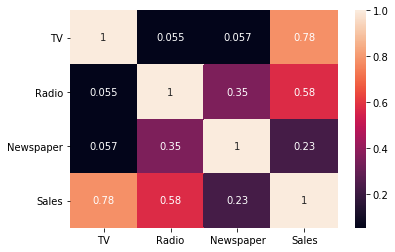

In [323]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

#### Predefining functions for training

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
def train_and_predict(x_train, x_test, y_train, y_test, lasso_alpha=1, ridge_alpha=1):
    models = {'linear regression':LinearRegression(), 
              'Lasso': Lasso(alpha=lasso_alpha),
              'Ridge': Ridge(alpha=ridge_alpha)}
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        print ("%s score: %f" % (model_name, score))


## Training and prediction, with different variation of feature engineering

#### 1. Consider all features

In [326]:
x_df = df.loc[:,df.columns!='Sales']
y_df = df[['Sales']]
x_df.shape, y_df.shape

((200, 3), (200, 1))

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state=random_state)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [328]:
train_and_predict(x_train, x_test, y_train, y_test)

linear regression score: 0.903205
Lasso score: 0.903379
Ridge score: 0.903205


#### 2. Remove feature, 'Newspaper'. Beacuse it has least effect on sales (by correlation matrix)

In [329]:
x_df = df[['TV', 'Radio']]
y_df = df[['Sales']]
x_df.shape, y_df.shape

((200, 2), (200, 1))

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state=random_state)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160, 1), (40, 1))

In [331]:
train_and_predict(x_train, x_test, y_train, y_test)

linear regression score: 0.903768
Lasso score: 0.903626
Ridge score: 0.903769


#### 3. Reduce Dimention from 3 to 2

In [332]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=random_state)

In [333]:
x_df = df.loc[:,df.columns!='Sales']
y_df = df[['Sales']]
x_df.shape, y_df.shape

((200, 3), (200, 1))

In [334]:
principalComponents = pca.fit_transform(x_df)
x_pca = pd.DataFrame(data=principalComponents, columns = ['pcmp1', 'pcmp2'])
x_pca.head()

,pcmp1,pcmp2
0,83.788546,39.780992
1,-102.138730,21.166608
2,-128.992484,46.616274
3,5.070972,32.460560
4,34.059003,20.938155


In [335]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_df, test_size = 0.2, random_state=random_state)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160, 1), (40, 1))

In [336]:
train_and_predict(x_train, x_test, y_train, y_test)

linear regression score: 0.731414
Lasso score: 0.731093
Ridge score: 0.731414


#### 4. Creating extra features

In [337]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [338]:
x_df = df.loc[:,df.columns!='Sales']
y_df = df[['Sales']]
x_df.shape, y_df.shape

((200, 3), (200, 1))

In [339]:
x_ndarr = poly.fit_transform(x_df)
x_dft = pd.DataFrame(data=x_ndarr, columns=poly.get_feature_names())
x_dft.head()

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2,x0^3,x0^2 x1,x0^2 x2,x0 x1^2,x0 x1 x2,x0 x2^2,x1^3,x1^2 x2,x1 x2^2,x2^3
0,1.0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64,1.218288e+07,2001359.178,3663863.892,328776.084,601886.376,1101866.064,54010.152,98875.728,181010.592,331373.888
1,1.0,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01,8.812112e+04,77823.825,89309.275,68729.805,78873.135,90513.445,60698.457,69656.499,79936.593,91733.851
2,1.0,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49,5.088448e+03,13579.056,20501.712,36237.132,54710.964,82602.828,96702.579,146001.933,220434.291,332812.557
3,1.0,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25,3.477266e+06,947927.925,1342706.625,258412.035,366031.575,518470.875,70444.997,99782.865,141338.925,200201.625
4,1.0,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56,5.910106e+06,353037.312,1909016.576,21088.512,114034.176,616629.248,1259.712,6811.776,36834.048,199176.704


In [340]:
x_train, x_test, y_train, y_test = train_test_split(x_dft, y_df, test_size = 0.2, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 20), (40, 20), (160, 1), (40, 1))

In [341]:
train_and_predict(x_train, x_test, y_train, y_test, lasso_alpha=100, ridge_alpha=5)

linear regression score: 0.990450
Lasso score: 0.977144
Ridge score: 0.990452
